## 3. Implement linear regression from scratch

If you want to dive deeper to understand linear regression you can implement it yourself following [these exercises here](https://github.com/kokchun/Machine-learning-AI22/blob/main/Exercises/E00_linear_regression.ipynb).

## 0. Simulate phone dataset (*)
We want to simulate data (x,y) to represent cost for phone subscriptions, with: 
* x - called minutes per month
* y - SEK per month

a) Use numpy.random.normal() to simulate a dataset with the following requirements:(*)
* set a seed to 42 (for reproducibility and reference)
* simulate 400 x-values from the r.v. 
* take absolute value of these x-values
* simulate noise 400 noise values from r.v. 
* Let 
* plot the data set

b) Now we want to remove some outliers according to this assumption: (*)
* no one talks more than 300 min using this type of subscription
* no ones costs can be negative
* plot the new dataset
* also plot ground truth using the true parameters

c) Insert the values into a DataFrame (*)

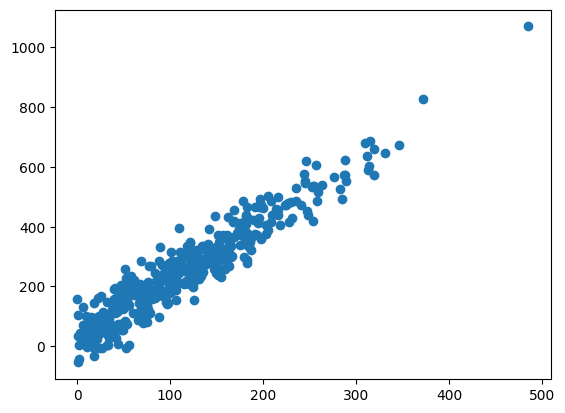

In [39]:
import numpy as np
import matplotlib.pyplot as plt
# a) Use numpy.random.normal() to simulate a dataset with the following requirements:(*) 
# set a seed to 42 (for reproducibility and reference) simulate 400 x-values from the r.v. X~N(100,100) take absolute value of these x-values simulate noise 400 noise values from r.v. £~N(0,50) Let y=2x+25+£ plot the data set


# set a seed to 42 (for reproducibility and reference)
np.random.seed(42)

# simulate 400 x-values from the r.v. X~N(100,100)
x = np.random.normal(loc=100, scale=100, size=400)

# take absolute value of these x-values(no negatives)
x = np.abs(x)

# simulate noise 400 noise values from r.v. £~N(0,50)
e = np.random.normal(loc=0, scale=50, size=400)

# Let y=2x+25+£ 
y = 2*x+25+e

# plot the data set
plt.scatter(x, y)

In [40]:
y.min()

np.float64(-54.484386920295805)

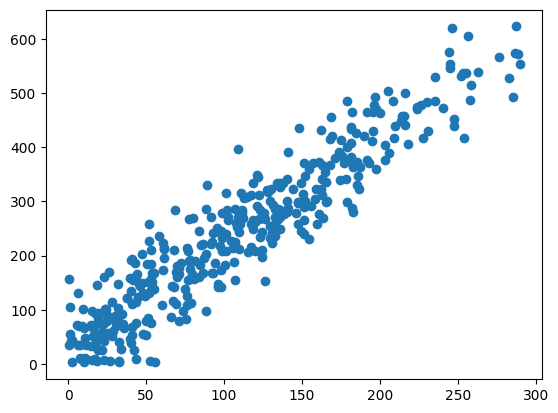

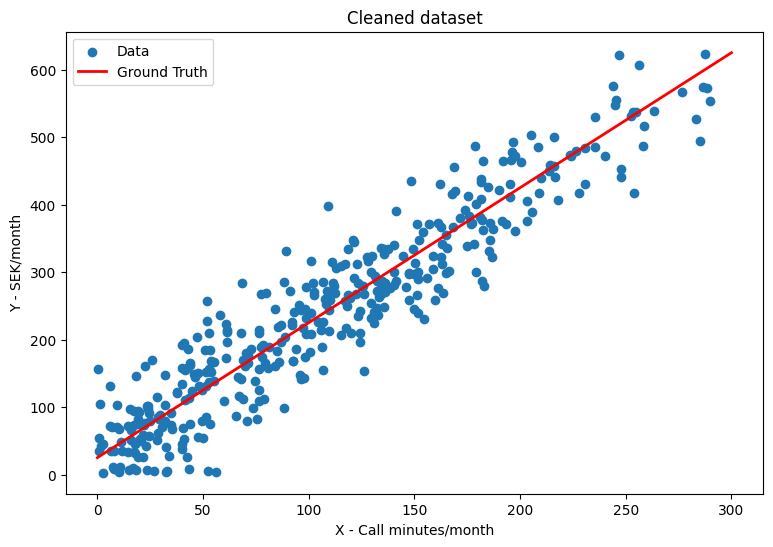

,Minutes,Cost
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
...,...,...
384,53.082435,183.822512
385,71.313453,165.649148
386,235.387237,529.849510
387,88.546015,203.507950


In [41]:
# b) Now we want to remove some outliers according to this assumption: (*)

# no one talks more than 300 min using this type of subscription
# x = called minutes per month
# x <= 300
mask = x <= 300
x = x[mask]
y = y[mask]

# no ones costs can be negative
# y = SEK per month
y = np.abs(y)

# plot the new dataset
plt.scatter(x,y)

# also plot ground truth using the true parameters
x_line = np.linspace(0, 300, 100)
y_line = 2 * x_line + 25

plt.figure(figsize=(9, 6))
plt.scatter(x, y, label="Data")
plt.plot(x_line, y_line, color="red", linewidth=2, label="Ground Truth")
plt.title("Cleaned dataset")
plt.xlabel("X - Call minutes/month")
plt.ylabel("Y - SEK/month")
plt.legend()
plt.show()

dataset = {
    "Minutes": x,
    "Cost": y
}

import pandas as pd

df = pd.DataFrame(dataset)
df

1. Train|test split (*)
Before moving on with linear regression we shall first perform a train-test-split.

a) Create a train-test-split function with the following call signature: (*)

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
that returns the tuple:

(X_train, X_test, y_train, y_test)
b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)

Hint
b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

In [42]:
# a) Create a train-test-split function with the following call signature: (*)
# def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
# that returns the tuple:

def train_test_split(
    X: pd.DataFrame, 
    y: pd.DataFrame, 
    train_fraction: float =.7, 
    random_state: int = 42, 
    replace:bool=False
    ) -> tuple:
    
    np.random.seed(random_state)
    
    # få fram längd/storlek på datan
    n = len(X)
    indices = np.arange(n)
    
    # bestäm storlek på träningsdatan, om train_fraction är 0.7, ta datans storlek * 0.7 (70% av datan)
    train_size = int(n*train_fraction)
    # slumpar fram samma antal index som är 70% av datan
    train_indices = np.random.choice(indices, size=train_size, replace=replace)
    
    # hämtar ut index som inte hämtats till train indices
    test_indices = np.setdiff1d(indices, train_indices)
    
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test

In [43]:
# b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)

X, y = pd.DataFrame(x), pd.DataFrame(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f"{X_train.shape = }")
print(f"{y_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (272, 1)
y_train.shape = (272, 1)
X_test.shape = (117, 1)
y_test.shape = (117, 1)


In [44]:
len(set(list(X_train.index) + list(X_test.index)))

389

In [45]:
len(X), len(X_train+X_test)

(389, 389)

In [46]:
X_test[:10], y_test[:10]

(             0
 1    86.173570
 8    53.052561
 13   91.328024
 14   72.491783
 20  246.564877
 21   77.422370
 27  137.569802
 32   98.650278
 34  182.254491
 40  173.846658,
              0
 1   167.378389
 8   137.119904
 13  271.539890
 14  186.599267
 20  621.167150
 21  267.611782
 27  334.442177
 32  208.830213
 34  464.626835
 40  391.896588)

In [47]:
# b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

X_train[:10], y_train[:10]

(              0
 271  106.980208
 46    53.936123
 167   24.626384
 42    88.435172
 350   17.276906
 181   77.653721
 153   28.564858
 33     5.771093
 116   16.867804
 148  125.049285,
               0
 271  285.744337
 46   151.202158
 167   56.677093
 42    98.498239
 350   94.569305
 181  189.400756
 153   61.535868
 33    72.419299
 116    9.857845
 148  279.428059)

## 2. Simple linear regression with normal equation (*)
Use the normal equation for simple linear regression to solve for the coefficients $\hat{B} =(B_0B_1)$
. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data.

Hint
It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy.

In [66]:
# y=Kx+m - K=lutning, m=skärpunkt
# w1 motsvarar K, w0 motsvarar m
# y=W0+W1*x
# y = kx + m
def linear_regression(x, y):
    # beräkna B1
    k = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)

    # beräkna B0
    m = y.mean() - k * x.mean()
    
    print("B0 (intercept):", m)
    print("B1 (slope):", k)
    
    return m, k

272

B0 (intercept): 0    32.830197
dtype: float64
B1 (slope): 0    1.898834
dtype: float64


C:\Users\organ\AppData\Local\Temp\ipykernel_4620\105374811.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y_pred = float(M) + float(K) * x_line                                # regression line


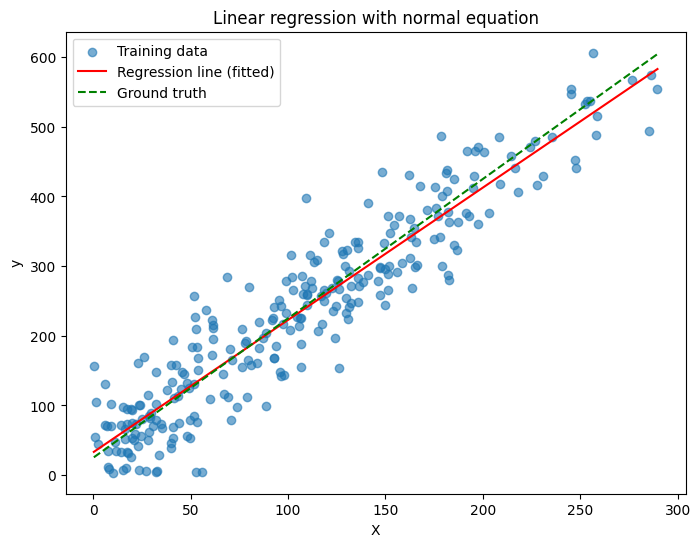

In [67]:
M, K = linear_regression(X_train, y_train)

# Skapa linje för prediktioner
x_line = np.linspace(X_train.min(), X_train.max(), 100)   # jämnt fördelade x-värden
x_line
y_pred = float(M) + float(K) * x_line                                # regression line
y_true = 25 + 2 * x_line                                 # ground truth (om du vet funktionen)
# len(y_true), len(x_line)
# # Plotta
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, label="Training data", alpha=0.6)
plt.plot(x_line, y_pred, color="red", label="Regression line (fitted)")
plt.plot(x_line, y_true, color="green", linestyle="--", label="Ground truth")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear regression with normal equation")
plt.show()

## 3. Prediction and evaluation (*)
  a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

  b) Calculate MAE, MSE, RMSE (*)

Hint
Calculate y_pred from X_test and use y_test and y_pred to compute different evaluation metrics.

Careful with dimensions when computing the evaluation metrics, else it can be catastrophical logical errors due to numpy broadcasting feature.

Note that after you have calculate the error metrics on test data you are not allowed to change any parameters to make the line fit better to the testing data.

B0 (intercept): 0    32.830197
dtype: float64
B1 (slope): 0    1.898834
dtype: float64


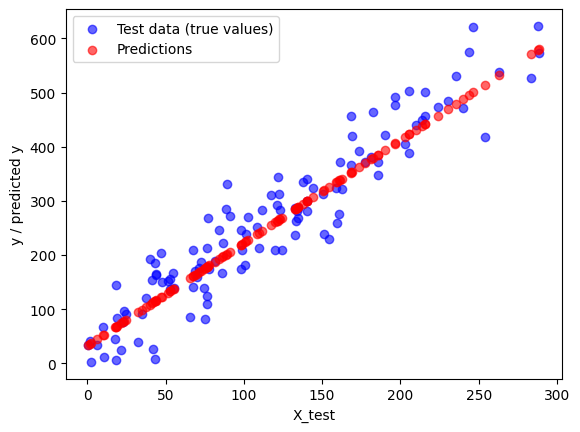

In [75]:
# Steg 1: Hämta dina koefficienter
M, K = linear_regression(X_train, y_train)

# Steg 2: Gör predictioner på testdatan
y_pred = M + K * X_test

# Steg 3: Plotta testdata vs prediction
plt.scatter(X_test, y_test, color="blue", label="Test data (true values)", alpha=0.6)
plt.scatter(X_test, y_pred, color="red", label="Predictions", alpha=0.6)

plt.xlabel("X_test")
plt.ylabel("y / predicted y")
plt.legend()
plt.show()

In [73]:
# MAE
mae = np.mean(np.abs(y_test - y_pred))

# MSE
mse = np.mean((y_test - y_pred) ** 2)

# RMSE
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 38.710788664662175
MSE: 2430.953187870168
RMSE: 49.30469742195127
